In [202]:
import numpy as np

In [203]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [204]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42) # 데이터 분할의 무작위성을 제어한다
# 데이터셋을 같은 방식으로 분할할 수 있다
# 이를 통해 실험을 재현할 수 있다

# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [205]:
from sklearn.linear_model import LinearRegression
# 선형 회귀 모델 클래스

In [206]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [207]:
lr.coef_ # 회귀 계수를 반환한다

# 독립 변수가 종속 변수에 미치는 영향을 나타낸다
# 즉 입력 변수가 출력 변수에 미치는 정도

array([39.01714496])

In [208]:
lr.intercept_ #절편을 반환한다

# 회귀 직선이 y축과 교차하는 지점을 나타낸다
# 모델의 예측을 보정하는 중요한 값이다

np.float64(-709.0186449535474)

In [209]:
import matplotlib.pyplot as plt

In [210]:
# y_hat=lr.coef_*x+lr.intercept_

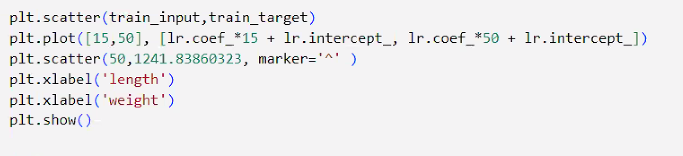

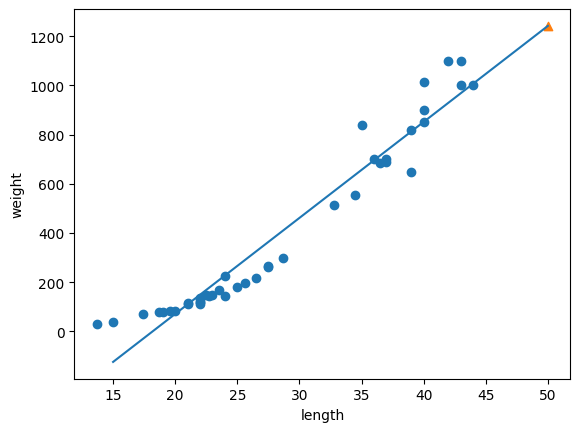

In [211]:
plt.scatter(train_input, train_target)
plt.plot([15,50],[lr.coef_*15+lr.intercept_,lr.coef_*50+lr.intercept_])
plt.scatter(50,1241.83860323,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [212]:
lr.score(train_input, train_target)

0.9398463339976041

In [213]:
lr.score(test_input, test_target)

0.824750312331356

# 다항 회귀

다항 회귀는 선형 회귀의 확장

입력 변수를 제곱하거나 더 높은 차수로 변환하여 모델링합니다

이렇게 하면 선형 모델이 비선형 데이터의 패턴을 학습할 수 있습니다

In [214]:
# class sklearn.preprocessing.PolynomialFeatures(degree=2, *,
# interaction_only=False, include_bias=True, order='C')

In [215]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
# 배열 제곱을 사용하여 배열 처리하는 것 => 다항 회귀 polynominal regression
# 단순 선형 회귀에 비해 더 복잡한 패턴을 학습할 수 있다

In [216]:
train_poly

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ],
       [ 625.  ,   25.  ],
       [1600.  ,   40.  ],
       [1521.  ,   39.  ],
       [1849.  ,   43.  ],
       [ 484.  ,   22.  ],
       [ 400.  ,   20.  ],
       [ 484.  ,   22.  ],
       [ 576.  ,   24.  ],
       [ 756.25,   27.5 ],
       [1849.  ,   43.  ],
       [1600.  ,   40.  ],
       [ 576.  ,   24.  ],
       [ 441.  ,   21.  ],
       [ 756.25,   27.5 ],
       [1600.  ,   40.  ],
       [1075.84,   32.8 ],
       [ 702.25,   26.5 ],
       [1332.25,   36.5 ],
       [ 187.69,   13.7 ],
       [ 515.29,   22.7 ],
       [ 225.  ,   15.  ],
       [1369.  ,   37.  ],
       [1225.  ,   35.  ],
       [ 823.69,   28.7 ],
       [ 552.25,   23.5 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [ 529.  ,   23.  ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 361.  ,   19.  ],
 

In [217]:
from sklearn.linear_model import LinearRegression

In [218]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [219]:
# 단순성형 (직선)
# 훈련데이터 모델 평가    테스트 모델 평가
# 0.9398463339976041    0.824750312331356

In [220]:
print(lr.coef_,lr.intercept_) # 회귀 계수와 절편


[  1.01433211 -21.55792498] 116.05021078278264


In [221]:
# y_hat = 1.01433211*x^2 + (-21.55792498)*x + 116.05021078278264

In [222]:
lr.score(train_poly,train_target)

0.9706807451768623

In [223]:
lr.score(test_poly,test_target)

0.9775935108325122

In [224]:
# 단순 모델보다는 다항이 더 좋아짐
# 하지만 과적합이 남아 있을 경우

# 규제를 하는 방법을 사용함 (라쏘 회귀(L1),릿지 회귀(L2))

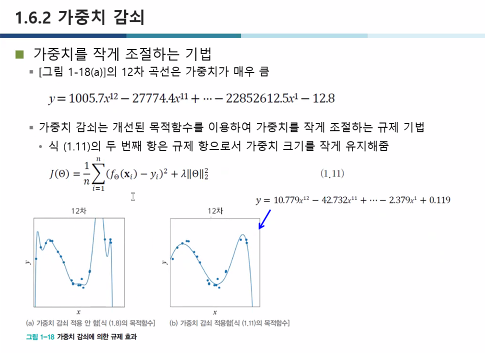

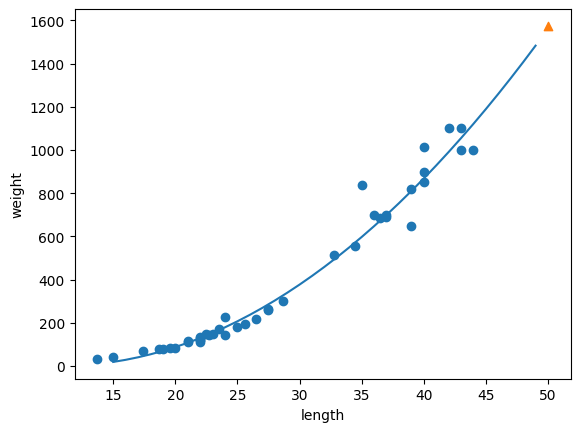

In [225]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 확인문제

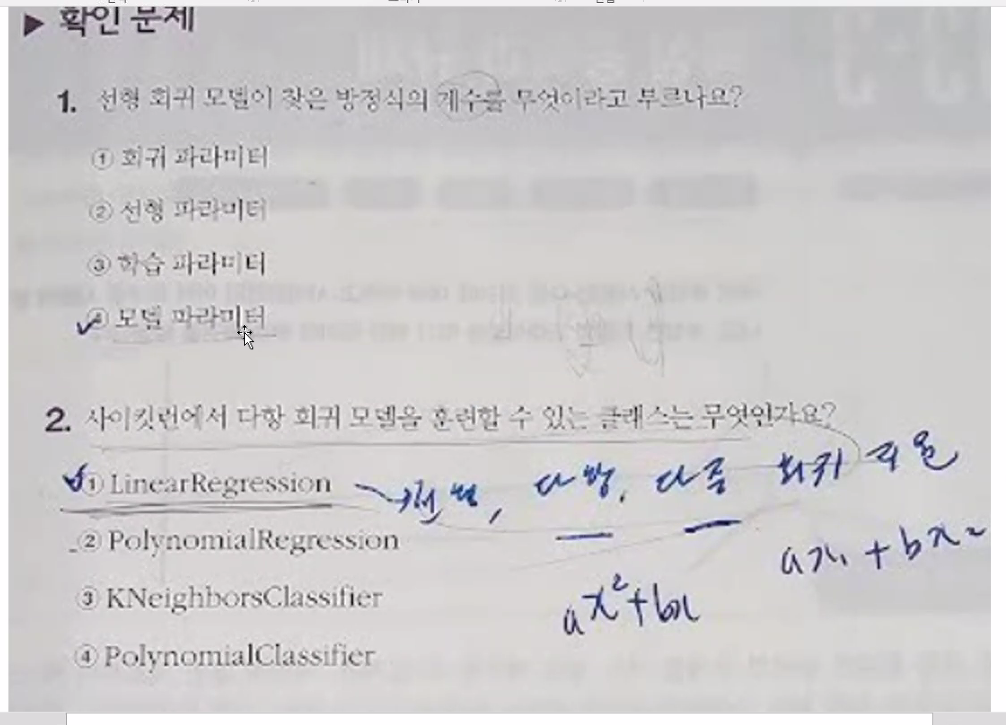

# 다항 특성 만들기

In [226]:
from sklearn.preprocessing import PolynomialFeatures
# 선형 회귀 모델에 다항식 특징을 추가하여 비선형 회귀를 구현함

In [227]:
poly=PolynomialFeatures()

In [228]:
# feature engineering
# 기존의 특성을 가지고 새로운 특성을 만들어낸다

### PolynomialFeatures를 사용하는 이유

선형 회귀 모델이 비선형 관계를 학습할 수 있도록 하기 위해서입니다.

기본적인 선형 회귀 모델은 입력 변수와 출력 변수 간의 선형 관계만을 모델링할 수 있습니다.

그러나 실제 데이터에서는 입력 변수와 출력 변수 간의 관계가 선형이 아닐 수 있습니다. 

이러한 경우, 다항 회귀를 사용하여 모델의 예측 능력을 향상시킬 수 있습니다.

In [229]:
poly.fit([[2,3]]) # 다항식 변환을 위한 2차원 배열

PolynomialFeatures()

In [230]:
poly.transform([[2,3]])

array([[1., 2., 3., 4., 6., 9.]])

In [231]:
import pandas as pd

In [232]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [233]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [234]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, 
                                                                      perch_weight,
                                                                      random_state=42)

In [235]:
poly_nominal = PolynomialFeatures(include_bias=False)
poly_nominal.fit([[2, 3]])
print(poly_nominal.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [239]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [240]:
poly_nominal.get_feature_names_out()
# 입력 데이터의 특징: x0, x1
# 제곱항: x0^2, x1^2
# 상호작용 항: x0*x1

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [241]:
test_poly = poly_nominal.transform(test_input)

In [242]:
test_poly

array([[8.400000e+00, 2.110000e+00, 1.410000e+00, 7.056000e+01,
        1.772400e+01, 1.184400e+01, 4.452100e+00, 2.975100e+00,
        1.988100e+00],
       [1.800000e+01, 5.220000e+00, 3.320000e+00, 3.240000e+02,
        9.396000e+01, 5.976000e+01, 2.724840e+01, 1.733040e+01,
        1.102240e+01],
       [2.750000e+01, 7.280000e+00, 4.570000e+00, 7.562500e+02,
        2.002000e+02, 1.256750e+02, 5.299840e+01, 3.326960e+01,
        2.088490e+01],
       [2.130000e+01, 6.380000e+00, 3.530000e+00, 4.536900e+02,
        1.358940e+02, 7.518900e+01, 4.070440e+01, 2.252140e+01,
        1.246090e+01],
       [2.250000e+01, 5.860000e+00, 3.620000e+00, 5.062500e+02,
        1.318500e+02, 8.145000e+01, 3.433960e+01, 2.121320e+01,
        1.310440e+01],
       [4.000000e+01, 1.114000e+01, 6.630000e+00, 1.600000e+03,
        4.456000e+02, 2.652000e+02, 1.240996e+02, 7.385820e+01,
        4.395690e+01],
       [3.000000e+01, 7.620000e+00, 4.770000e+00, 9.000000e+02,
        2.286000e+02, 1.431000

In [244]:
poly_nominal = PolynomialFeatures(include_bias=False)
poly_nominal.fit(train_input)
train_poly=poly_nominal.transform(train_input)

# 훈련 세트에 대한 평가

In [246]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


# 테스트 세트에 대한 평가

In [247]:
poly_nominal.fit(test_input)
test_poly=poly_nominal.transform(test_input)

In [248]:
print(lr.score(test_poly,test_target))

0.9714559911594145


In [249]:
# 정규화(표준화-평균0,표준편차1)

In [250]:
from sklearn.preprocessing import StandardScaler

In [255]:
sc=StandardScaler()

In [258]:
train_poly[:,0]

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [256]:
train_poly[:,0].mean()

np.float64(28.445238095238096)

In [257]:
train_poly[:,0].std()

np.float64(8.728311961955496)

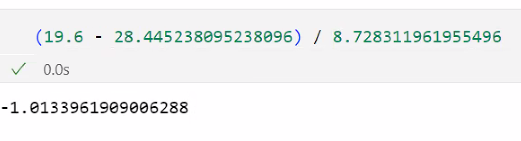

In [ ]:
# 반드시 훈련 세트로 학습한 변환기를 테스트 세트까지 변환해야함

In [259]:
sc.fit(train_poly)
train_scaled=sc.transform(train_poly)
test_scaled=sc.transform(test_poly)

In [260]:
train_scaled

array([[-1.01339619, -1.01007487, -1.01952321, -0.9549757 , -0.9496784 ,
        -0.95745849, -0.93942079, -0.94342509, -0.94100107],
       [-0.73842893, -0.75254307, -0.74466913, -0.76472563, -0.7717585 ,
        -0.77238267, -0.7747325 , -0.77298293, -0.76716811],
       [-1.11650891, -0.98919391, -0.97371419, -1.02065999, -0.9714645 ,
        -0.97031097, -0.92689165, -0.92331614, -0.91379551],
       [-1.26544951, -1.20148364, -1.07678447, -1.11008743, -1.0794873 ,
        -1.04481394, -1.04749571, -1.01503633, -0.97401432],
       [ 0.86554673,  0.89357239,  1.09914363,  0.78258063,  0.79878122,
         0.93990033,  0.80045116,  0.93459078,  1.05668676],
       [-0.39471986, -0.55765413, -0.65305111, -0.49604314, -0.5750369 ,
        -0.62146959, -0.63540138, -0.67211558, -0.70357069],
       [ 1.3238255 ,  1.35295344,  1.31101032,  1.3618677 ,  1.39093563,
         1.37273894,  1.40131663,  1.38189727,  1.33959041],
       [ 1.2092558 ,  1.52696142,  1.44843736,  1.21132928,  1

In [261]:
test_scaled

array([[-2.29657672, -2.0645632 , -1.95288184, -1.55255604, -1.46585499,
        -1.45227925, -1.38306012, -1.36853915, -1.3414385 ],
       [-1.1967077 , -0.98223359, -0.85919166, -1.06961356, -0.99185789,
        -0.95563426, -0.92268296, -0.88613609, -0.84269005],
       [-0.10829564, -0.26532073, -0.14342584, -0.24593976, -0.33131102,
        -0.27243127, -0.40265507, -0.35050682, -0.29821992],
       [-0.81862772, -0.57853509, -0.738943  , -0.82248284, -0.73113338,
        -0.79571408, -0.65093557, -0.71169499, -0.76327608],
       [-0.68114409, -0.75950338, -0.68740786, -0.72232715, -0.75627694,
        -0.73081938, -0.77947435, -0.75565643, -0.72775096],
       [ 1.3238255 ,  1.07802084,  1.03615624,  1.3618677 ,  1.19446273,
         1.17373268,  1.033252  ,  1.01345388,  0.97549516],
       [ 0.17812859, -0.14699531, -0.02890331,  0.027983  , -0.15473411,
        -0.09182273, -0.3003459 , -0.2470788 , -0.19509493],
       [-0.44054774, -0.45672951, -0.3724709 , -0.53384924, -0

# 릿지

In [262]:
# 기준 0.9714559911594145

In [264]:
# 릿지(L2): 계수를 제곱한 값을 기준으로 적용

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9857915060511934


In [265]:
print(ridge.score(test_scaled, test_target))

0.9835057194929058


In [266]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [267]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [268]:
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

C:\Users\acy\AppData\Local\Temp\ipykernel_16684\1397267799.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


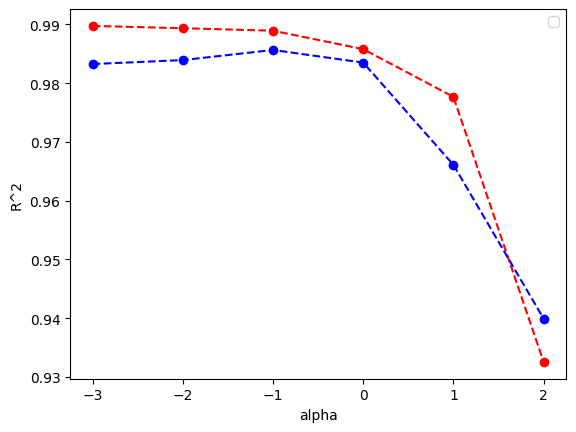

In [271]:
plt.plot(np.log10(alpha_list), train_score,'o--r')
plt.plot(np.log10(alpha_list), test_score,'o--b')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

In [272]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9889354346720892
0.9856564835209132


# 라쏘

In [273]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.986591255464559


In [274]:
print(lasso.score(test_scaled, test_target))

0.9846056618190413
